In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os 

In [2]:
# Membatasi alokasi memori GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Hanya mengalokasikan memori yang diperlukan
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)  

In [3]:
DEFAULT_DIR = 'Animals'

train_dir = os.path.join(DEFAULT_DIR,'train')
test_dir = os.path.join(DEFAULT_DIR,'test')


In [4]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=train_dir,
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
    seed=12
)


train_dataset 

Found 2400 files belonging to 3 classes.


<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 3), dtype=tf.float32, name=None))>

<h5> USING DATA AUGMENTATION

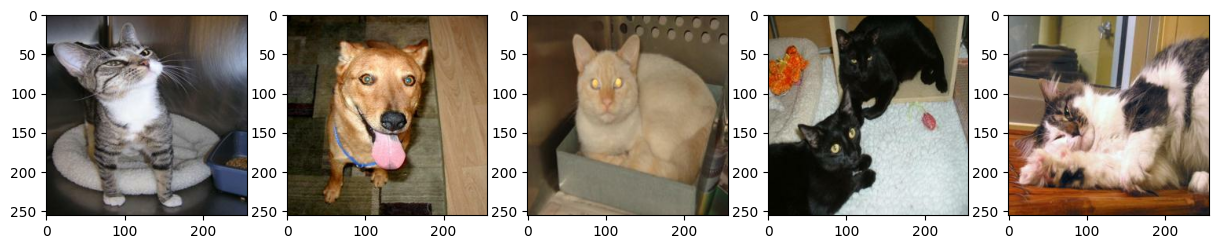

In [5]:
list_image = list(train_dataset.take(1)) # hasilnya dalam bentuk [(image,label)]

random_image = list_image[0][0] # TAKE ONLY IMAGE

# SHOW 5 IMAGES from 1 batch 
plt.figure(figsize=(15,7))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(random_image[i].numpy().astype('uint8'))
    

In [6]:
def image_augmentation(image,model):
    preview_image = []   # UNTUK MENAMPUNG BERMACAM2 GAMBAR
    imagePIL = tf.keras.utils.array_to_img(x=image,scale=True) # CHANGE ARRAY NUMPY/TENSOR TO IMAGE PIL
    preview_image.append(imagePIL)    

    for i in range(5):     # I WANT TO MAKE 5 AUGMENTED IMAGE
        image_with_AUG = model(tf.expand_dims(input = image , axis=0)) # MELAKUKAN AUGMENTASI GAMBAR
        remove_batch_img = tf.keras.utils.array_to_img(x = tf.squeeze(input = image_with_AUG)) # CONVERT AUGMENTED IMG TO PIL IMAGE
        preview_image.append(remove_batch_img)

    fig , axes = plt.subplots(1,6, figsize=(16,16))  # GET CANVAS 1 ROW 6 COLUMNS

    for index , ax in enumerate(axes):
        ax.imshow(preview_image[index])  # SHOW IMAGE TO - i 
        ax.set_axis_off()    #REMOVE AXIS

        if index == 0:
            ax.set_title('original')
        else:
            ax.set_title(f'Augmented {index}')
    

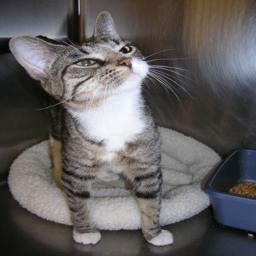

In [7]:
sample = tf.keras.utils.array_to_img(random_image[0]) # SHOW A FIRST IMAGE
sample

In [ ]:
# CREATE AUGMENTED LAYERS
data_augmented = tf.keras.Sequential(
    layers=[
        tf.keras.layers.Input(shape=(256,256)),
        # DOING HORIZONTAL FLIP
        tf.keras.layers.experimental.preprocessing.RandomFlip(mode='horizontal',seed=12),

        #DOING ROTATION WITH -20% ~ 20% MAX ROTATION , AND FILL BLANK ROTATED IMAGE WITH A NEAREST PIXEL 
        tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.2,fill_mode='nearest',seed=12),

        # SHIFT AN IMAGE TO 10% MAX HEIGHT (SHIFT UP AND DOWN) AND 20% MAX WIDTH (SHIFT LEFT AND RIGHT)
        tf.keras.layers.experimental.preprocessing.RandomTranslation(height_factor=0.1,width_factor=0.2,fill_mode='nearest'),

        # ZOOM AN IMAGE 
        tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.3,width_factor=0.2,fill_mode='nearest'),

        # CROP AN IMAGE STARTS IN CENTER
        tf.keras.layers.experimental.preprocessing.CenterCrop(height=220,width=245)
    ]
)

(None,)

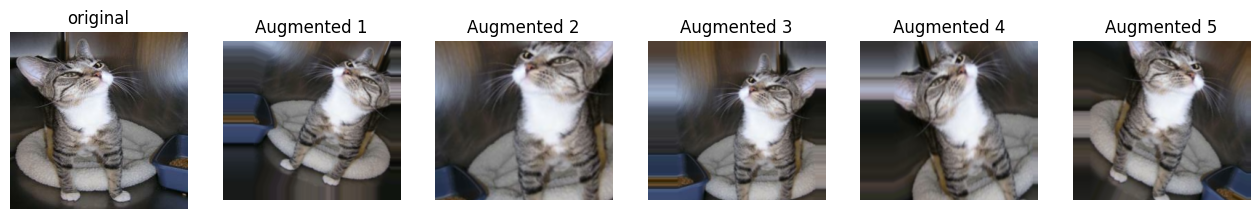

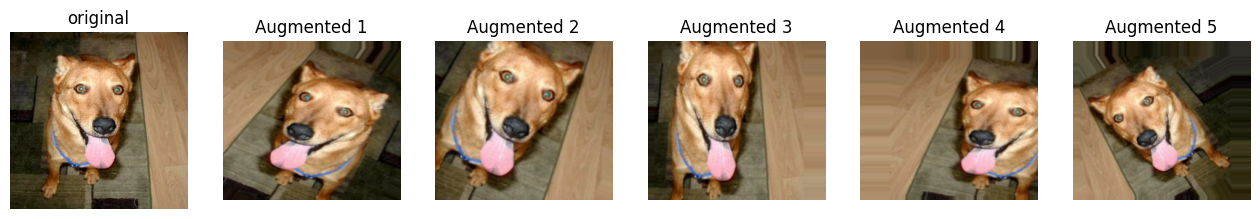

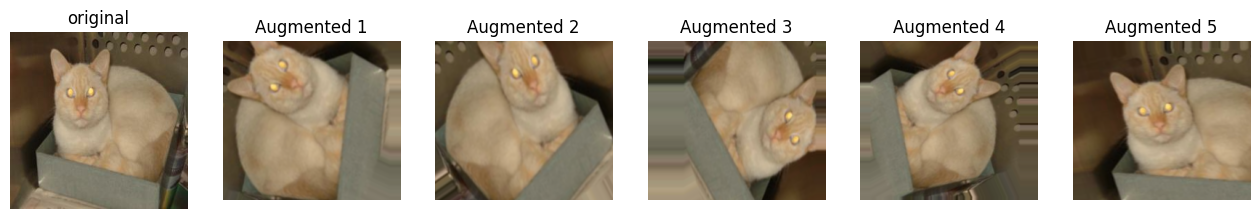

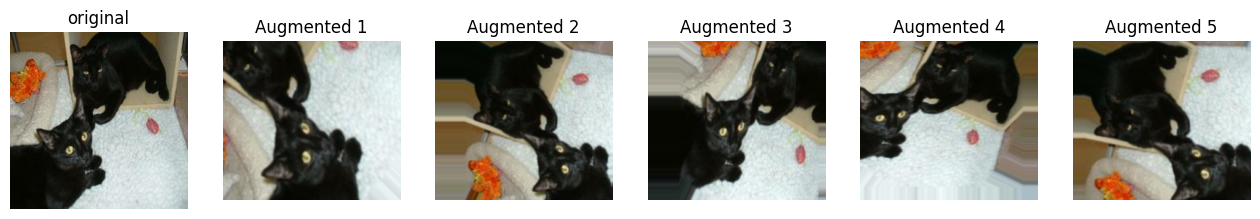

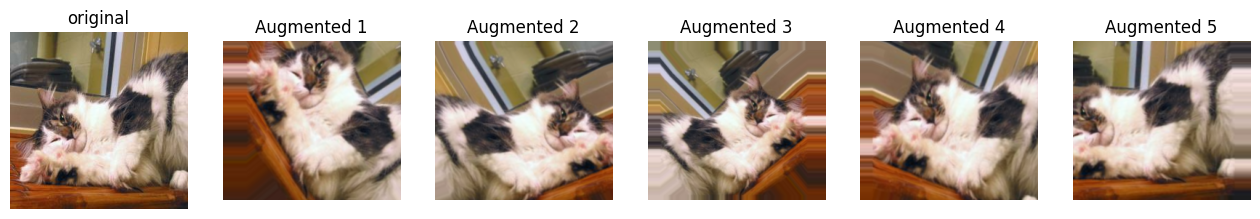

In [9]:
# VISUALIZE IMAGE SEGMENTATION

image_augmentation(random_image[0],data_augmented)
image_augmentation(random_image[1],data_augmented)
image_augmentation(random_image[2],data_augmented)
image_augmentation(random_image[3],data_augmented)
image_augmentation(random_image[4],data_augmented),